In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
apple = cv2.cvtColor(cv2.imread('train/apple/529e62121b0e316ddefbcfd050697cd8.webp'), cv2.COLOR_BGR2RGB)

In [30]:
class FruitsPreprocessor:

    def __init__(self, max_brightness=255, resize_value=128):
        self.max_brightness = max_brightness
        self.resize_value = resize_value
        pass
    
    def resize(self, img):
        return cv2.resize(img, (self.resize_value, self.resize_value))

    def center_crop(self, img):
        width = img.shape[1]
        height = img.shape[0]

        center_x = int(width/2)
        center_y = int(height/2)

        min_axis_half = int(min(width, height) / 2)

        cropped = img[(center_y-min_axis_half):(center_y+min_axis_half),
                       center_x-min_axis_half:center_x+min_axis_half,:]
        return cropped

    def normalize(self, img):
        return cv2.normalize(img, None, 0, self.max_brightness, cv2.NORM_MINMAX)
        
    def preprocess_one(self, img):
        functions = ['center_crop', 'resize', 'normalize']
        for preprocess_func in functions:
            img = getattr(self, preprocess_func)(img)
        return img

    def transform(self, imgs):
        preprocessed_imgs = []
        for i in range(len(imgs)):
            preprocessed_imgs.append(self.preprocess_one(imgs[i]))
        return np.array(preprocessed_imgs)

In [34]:
apple = cv2.cvtColor(cv2.imread('apple.jpg'), cv2.COLOR_BGR2RGB)
flower = cv2.cvtColor(cv2.imread('flower.jpg'), cv2.COLOR_BGR2RGB)

dataset = np.array([apple, flower])

preprocessor = FruitsPreprocessor()
preprocessor.transform(dataset)
pass

C:\Users\DZMITR~1\AppData\Local\Temp/ipykernel_22984/139996025.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dataset = np.array([apple, flower])


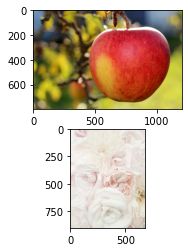

In [35]:
plt.subplot(2,1,1)
plt.imshow(apple)
plt.subplot(2,1,2)
plt.imshow(flower)

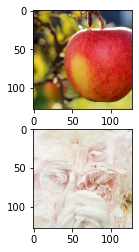

In [36]:
preprocessed = preprocessor.transform(dataset)
apple_preproc = preprocessed[0]
flower_preproc = preprocessed[1]

plt.subplot(2,1,1)
plt.imshow(apple_preproc)
plt.subplot(2,1,2)
plt.imshow(flower_preproc)